# SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

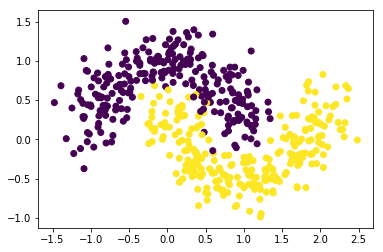

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

In [4]:
# Sorry, cannot without grid
param_grid_svm = {
    'C' : np.linspace(0.1, 10, num=50)
}
grid_svm = GridSearchCV(SVC(kernel='linear'), param_grid_svm, cv=3, iid=True, verbose=1)
grid_svm.fit(moons_points, moons_labels)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'C': array([ 0.1    ,  0.30204,  0.50408,  0.70612,  0.90816,  1.1102 ,
        1.31224,  1.51429,  1.71633,  1.91837,  2.12041,  2.32245,
        2.52449,  2.72653,  2.92857,  3.13061,  3.33265,  3.53469,
        3.73673,  3.93878,  4.14082,  4.34286,  4.5449 ,  4.74694,
        4.94898...367,
        8.58571,  8.78776,  8.9898 ,  9.19184,  9.39388,  9.59592,
        9.79796, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [5]:
svm = grid_svm.best_estimator_

In [6]:
param_grid_lr = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0.1, 10, num=50)
}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=3, iid=True, verbose=1)
grid_lr.fit(moons_points, moons_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.1    ,  0.30204,  0.50408,  0.70612,  0.90816,  1.1102 ,
        1.31224,  1.51429,  1.71633,  1.91837,  2.12041,  2.32245,
        2.52449,  2.72653,  2.92857,  3.13061,  3.33265,  3.53469,
        3.73673,  3.93878,  4.14082,  4.34286,  4.5449 , ...367,
        8.58571,  8.78776,  8.9898 ,  9.19184,  9.39388,  9.59592,
        9.79796, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [7]:
lr = grid_lr.best_estimator_

In [4]:
from sklearn.exceptions import NotFittedError

def plot_decisions(X, y, estimator, scorer, score_name, title, figsize=(16,9), show_figure=True):
    try:
        estimator.predict(X)
    except NotFittedError as e:
        estimator.fit(X, y)
    
    score = scorer(y, estimator.predict(X))
    
    if show_figure: plt.figure(figsize=figsize)
    plt.title(title)
    plot_decision_regions(X, y, estimator, legend=0)
    print("{} : {}".format(score_name, score))
    if show_figure: plt.show()

Accuracy : 0.86


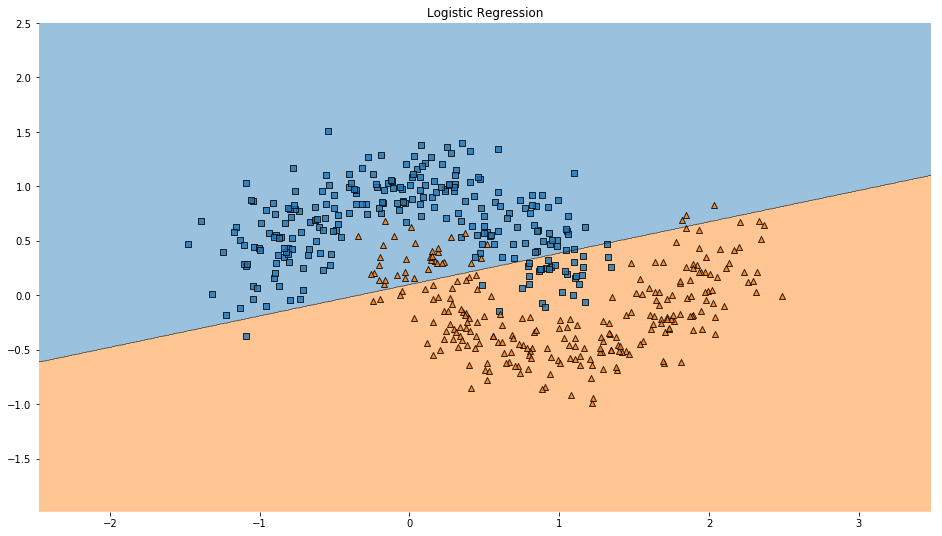

In [9]:
plot_decisions(moons_points, moons_labels, 
               lr, accuracy_score, "Accuracy", "Logistic Regression")

Accuracy : 0.862


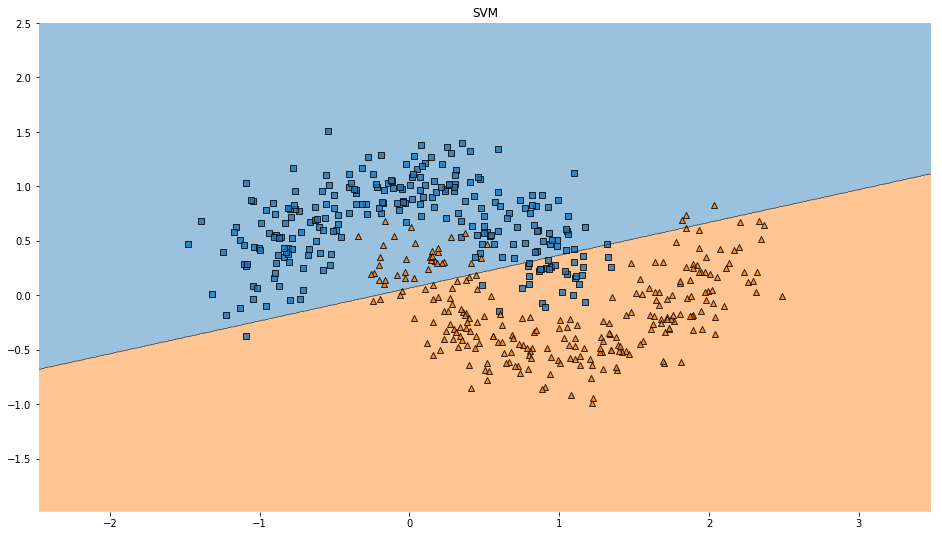

In [10]:
plot_decisions(moons_points, moons_labels, 
               svm, accuracy_score, "Accuracy", "SVM")

`SVC` и `LogisticRegression` отделяют данные прямой, что не подходит в нашем случае, так как, очевидно, зависимости нелинейные.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Accuracy : 0.832


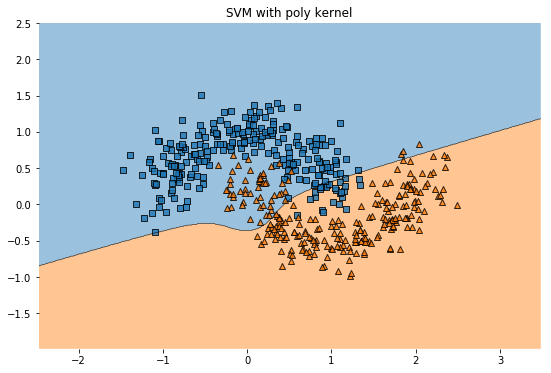

In [11]:
plot_decisions(moons_points, moons_labels, 
               SVC(kernel="poly", gamma="auto"),
               accuracy_score, "Accuracy", "SVM with poly kernel", figsize=(9,6))

Accuracy : 0.968


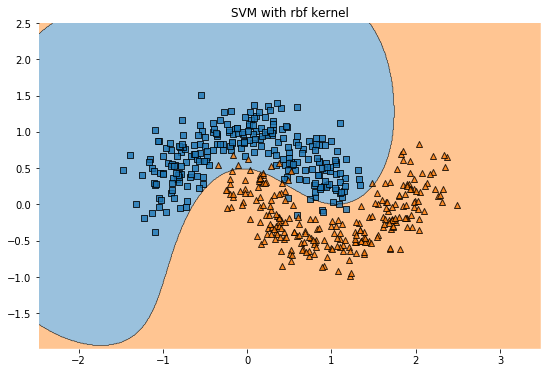

In [12]:
plot_decisions(moons_points, moons_labels, 
               SVC(kernel="rbf", gamma="auto"),
               accuracy_score, "Accuracy", "SVM with rbf kernel", figsize=(9,6))

Accuracy : 0.68


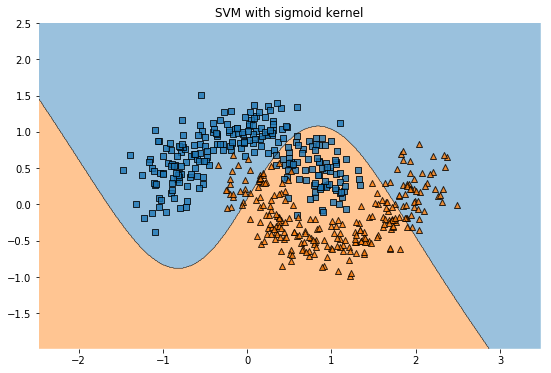

In [13]:
plot_decisions(moons_points, moons_labels, 
               SVC(kernel="sigmoid", gamma="auto"),
               accuracy_score, "Accuracy", "SVM with sigmoid kernel", figsize=(9,6))

На первый взгляд, лучше всех справляется SVM с rbf ядром, а хуже с sigmoid ядром. Поиграем немного с параметрами.

In [5]:
from tqdm import tqdm_notebook

Accuracy with degree 1 : 0.854
Accuracy with degree 2 : 0.75
Accuracy with degree 3 : 0.832
Accuracy with degree 4 : 0.722
Accuracy with degree 5 : 0.784
Accuracy with degree 6 : 0.72
Accuracy with degree 7 : 0.758
Accuracy with degree 8 : 0.716
Accuracy with degree 9 : 0.744



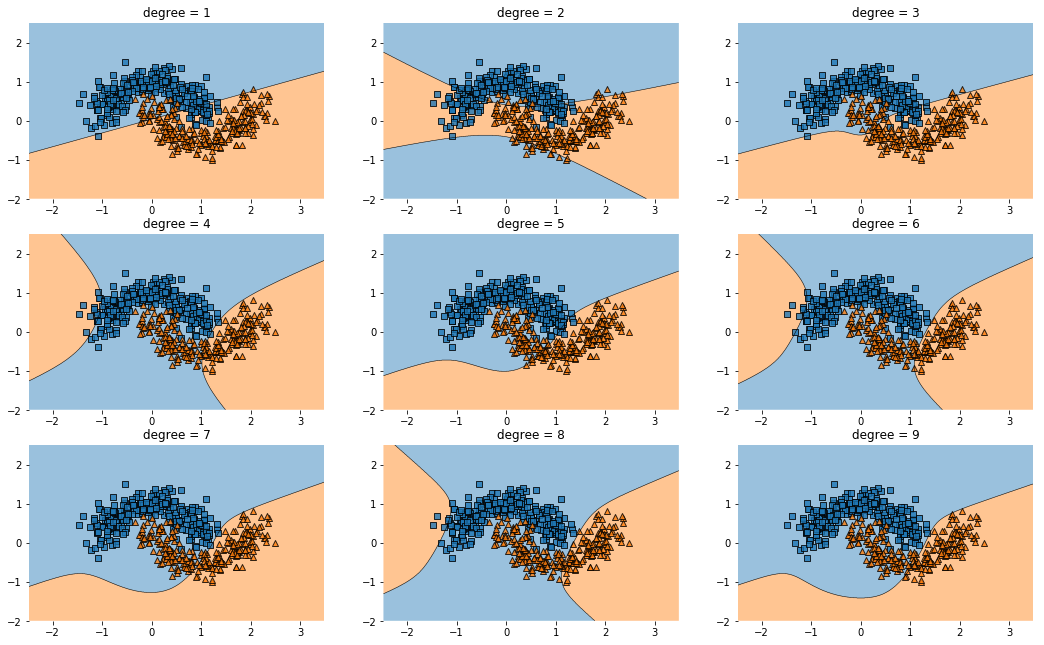

CPU times: user 23.5 s, sys: 2.52 s, total: 26 s
Wall time: 22.6 s


In [15]:
%%time
# let's start with poly kernel
# look at degrees
degrees = np.arange(1, 10)
plt.figure(figsize=(18, 11))
for i, degree in tqdm_notebook(enumerate(degrees)):
    plt.subplot(3,3,i+1)
    plot_decisions(moons_points, moons_labels, 
                   SVC(kernel='poly', gamma='auto', degree=degree),
                   accuracy_score, "Accuracy with degree {}".format(degree),
                   "degree = {}".format(degree), show_figure=False)
plt.show()


Accuracy with c 0.01 : 0.73
Accuracy with c 0.1 : 0.792
Accuracy with c 1.0 : 0.832
Accuracy with c 10 : 0.904
Accuracy with c 50 : 0.896
Accuracy with c 100 : 0.896
Accuracy with c 500 : 0.892
Accuracy with c 1000 : 0.892
Accuracy with c 5000 : 0.892



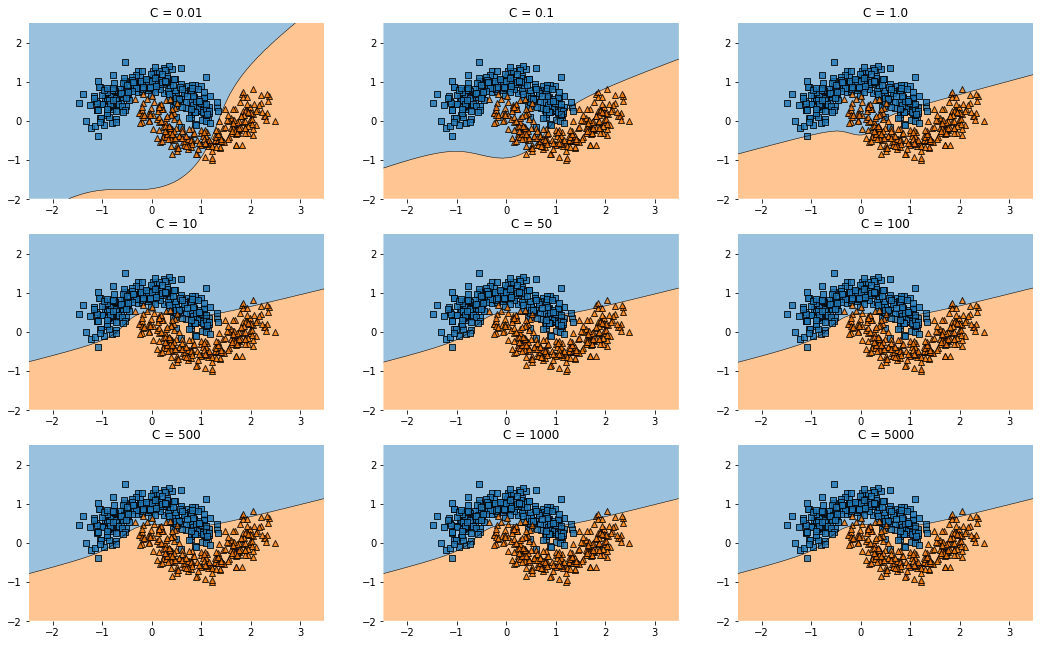

CPU times: user 17.8 s, sys: 2.74 s, total: 20.6 s
Wall time: 17 s


In [16]:
%%time
# degree in our case is useless. Let's try regularization parameter

regularization_list = [0.01, 0.1, 1., 10, 50, 100, 500, 1000, 5000]
plt.figure(figsize=(18, 11))
for i, C in tqdm_notebook(enumerate(regularization_list)):
    plt.subplot(3,3,i+1)
    plot_decisions(moons_points, moons_labels, 
                   SVC(kernel='poly', gamma='auto', C=C),
                   accuracy_score, "Accuracy with c {}".format(C),
                   "C = {}".format(C), show_figure=False)
plt.show()


Accuracy with gamma 'auto' : 0.904
Accuracy with gamma 'scale' : 0.898



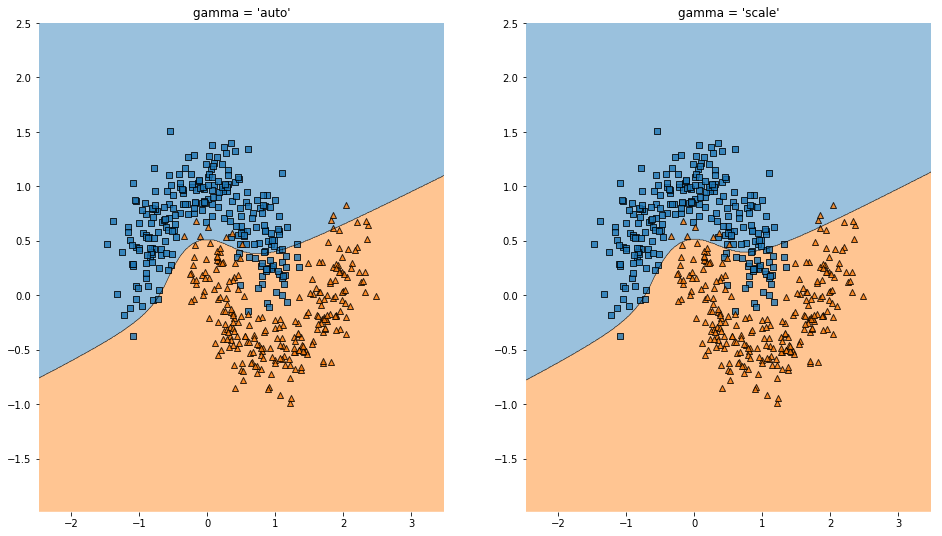

CPU times: user 2.6 s, sys: 668 ms, total: 3.26 s
Wall time: 2.34 s


In [17]:
%%time
# C = 10 is pretty well. Lastly, try gamma parameter

gammas = ['auto', 'scale']
plt.figure(figsize=(16, 9))
for i, gamma in tqdm_notebook(enumerate(gammas)):
    plt.subplot(1,2,i+1)
    plot_decisions(moons_points, moons_labels, 
                   SVC(kernel='poly', gamma=gamma, C=10),
                   accuracy_score, "Accuracy with gamma '{}'".format(gamma),
                   "gamma = '{}'".format(gamma), show_figure=False)
plt.show()


Accuracy with C 0.01 : 0.826
Accuracy with C 0.1 : 0.898
Accuracy with C 1.0 : 0.968
Accuracy with C 10 : 0.974
Accuracy with C 50 : 0.984
Accuracy with C 100 : 0.982
Accuracy with C 500 : 0.986
Accuracy with C 1000 : 0.982
Accuracy with C 5000 : 0.984



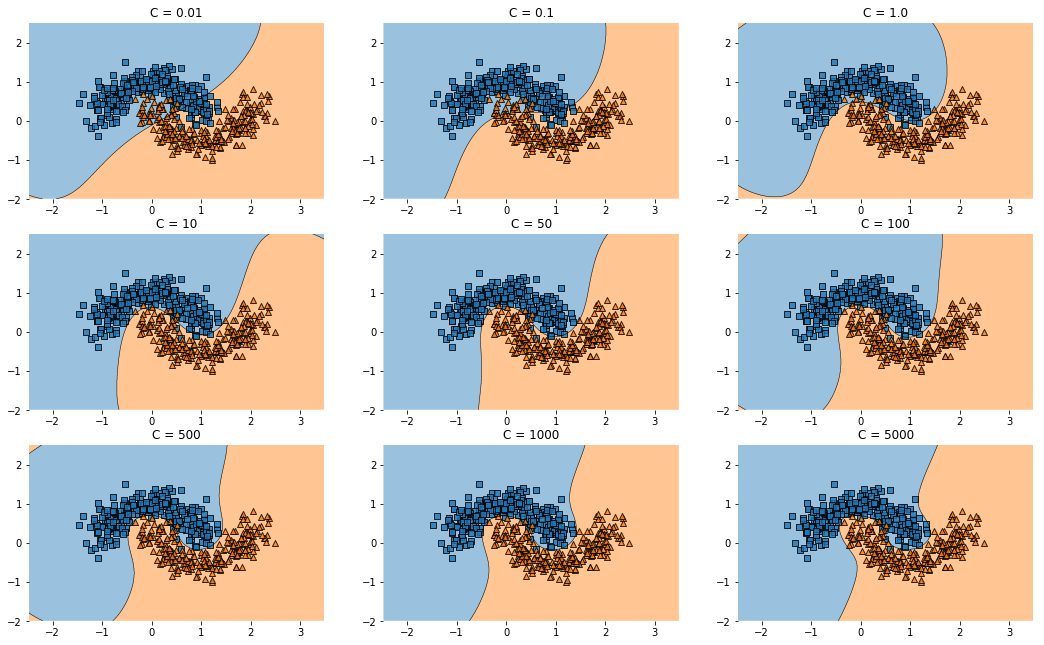

CPU times: user 27 s, sys: 3.22 s, total: 30.2 s
Wall time: 25.9 s


In [18]:
%%time
# now let's go to the rbf kernel. Degree is useless in this case

regularization_list = [0.01, 0.1, 1., 10, 50, 100, 500, 1000, 5000]
plt.figure(figsize=(18, 11))
for i, C in tqdm_notebook(enumerate(regularization_list)):
    plt.subplot(3,3,i+1)
    plot_decisions(moons_points, moons_labels, 
                   SVC(kernel='rbf', gamma='auto', C=C),
                   accuracy_score, "Accuracy with C {}".format(C),
                   "C = {}".format(C), show_figure=False)
plt.show()


Accuracy with C 0.01 : 0.798
Accuracy with C 0.1 : 0.752
Accuracy with C 1.0 : 0.68
Accuracy with C 10 : 0.666
Accuracy with C 50 : 0.668
Accuracy with C 100 : 0.668
Accuracy with C 500 : 0.668
Accuracy with C 1000 : 0.668
Accuracy with C 5000 : 0.668



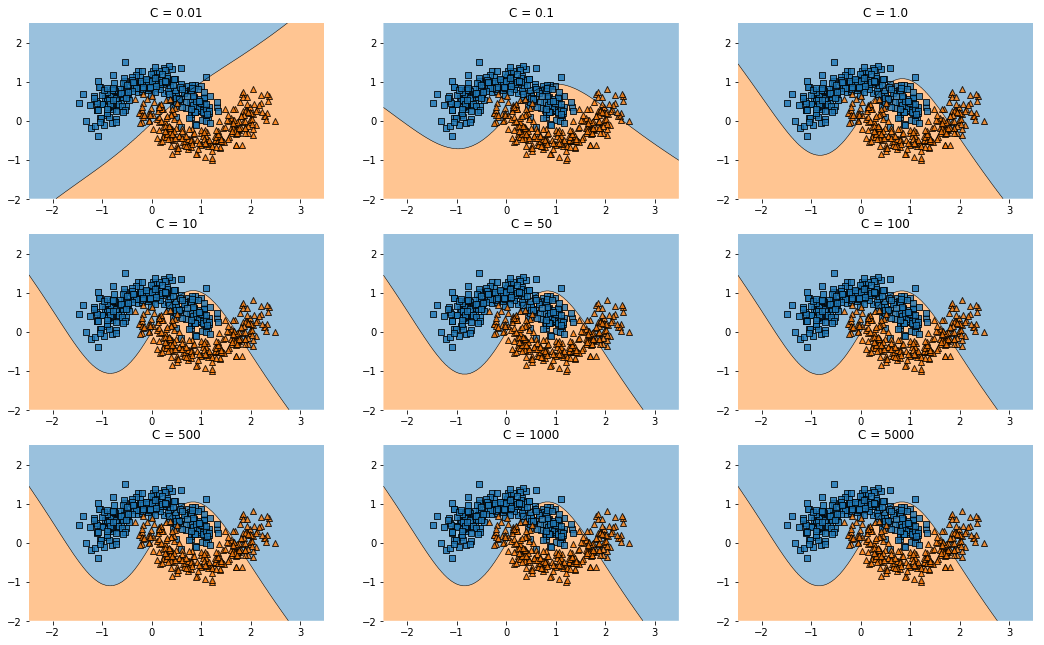

CPU times: user 1min 10s, sys: 3.3 s, total: 1min 13s
Wall time: 1min 9s


In [19]:
%%time
# now let's go to the sigmoid kernel. Degree is also useless in this case

regularization_list = [0.01, 0.1, 1., 10, 50, 100, 500, 1000, 5000]
plt.figure(figsize=(18, 11))
for i, C in tqdm_notebook(enumerate(regularization_list)):
    plt.subplot(3,3,i+1)
    plot_decisions(moons_points, moons_labels, 
                   SVC(kernel='sigmoid', gamma='auto', C=C),
                   accuracy_score, "Accuracy with C {}".format(C),
                   "C = {}".format(C), show_figure=False)
plt.show()

**Вывод**

* What have happenned with classification quality?

`rbf` показал себя лучше всего на этом датасете (с правильным подбором параметра регуляризации модель почти никогда не ошибается). Также, если правильно подобрать параметр регуляризации для `poly kernel`, то результат тоже будет довольно хороший `accuracy` ~0.9 `sigmoid` показал себя довольно плохо. Также надо заметить, что `svm` с `poly` вычисляется значительно быстрее, чем с `rbf` 

* How did decision border changed for each kernel?

`sigmoid` напоминает синусоиду, довольно понятно, почему это ядро не подходит в данном случае
`poly` пытается отделить классы прямой, но там, где это нельзя сделать появляются выступы (при изменении параметра регуляризации)
`rbf` замкнутая кривая вокруг одного из классов

* What `degree` have you chosen and why?

`degree` применим только для `poly` ядра при нечетных значениях `degree` плоскость представляет собой прямую с "ямой", при четных в середине классифицируется как один класс, по края, как другой. Понятно, что в нашем случае такие варианты не подходят, поэтому я выбрал `degree=1` и `C=10`, что дало относительно неплохой `accuracy_score`

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Accuracy with degree 1 : 0.86
Accuracy with degree 2 : 0.862
Accuracy with degree 3 : 0.97
Accuracy with degree 4 : 0.972
Accuracy with degree 5 : 0.978
Accuracy with degree 6 : 0.978



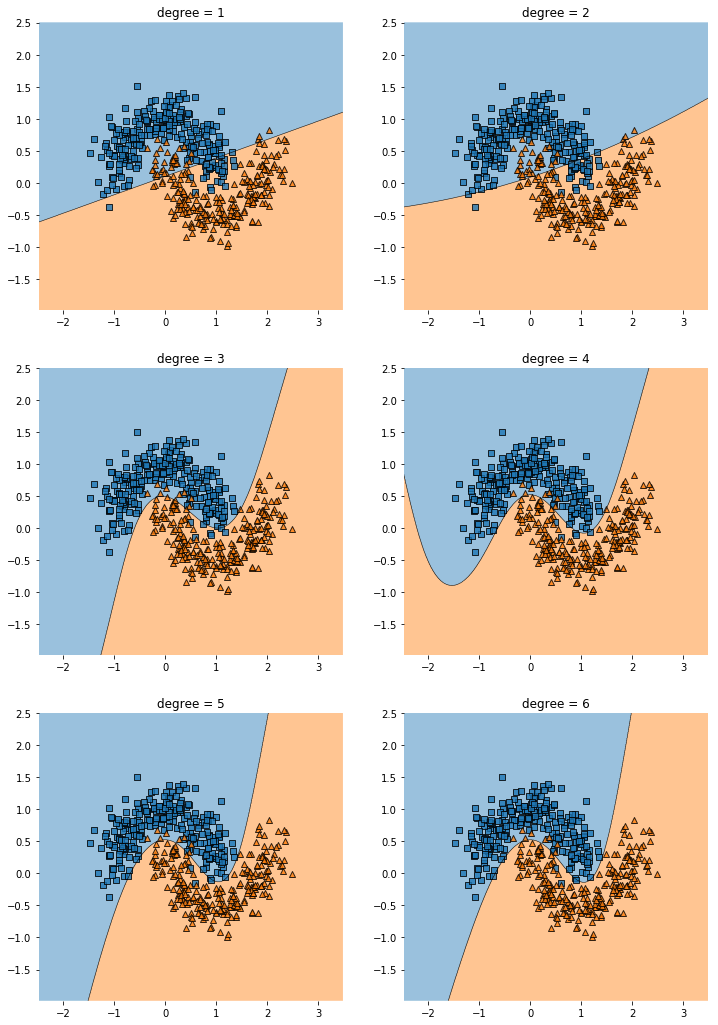

CPU times: user 8.17 s, sys: 7.67 s, total: 15.8 s
Wall time: 5.44 s


In [49]:
%%time
degrees = np.arange(1, 7)
plt.figure(figsize=(12, 18))

for i, degree in tqdm_notebook(enumerate(degrees)):
    plt.subplot(3,2,i+1)
    plot_decisions(moons_points, moons_labels, 
                   Pipeline([
                       ('polynomial_features', PolynomialFeatures(degree=degree)),
                       ('lr_clf', lr)
                   ]),
                   accuracy_score, "Accuracy with degree {}".format(degree),
                   "degree = {}".format(degree), show_figure=False)
plt.show()


**Вывод**

* Comare SVM's results with this solution (quality, borders type)

В качестве данная модель выигрывает у `svm` с `kernel` `poly` и `sigmoid`, и почти так же хороша, как и `svm` с `kernel` `rbf`. Начиная уже с 3й степени, модель разделяет плоскость на области, которые похожи на истинные.

* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Достаточно использовать `PolynomialFeatures` с `degree=3`, что дает `accuracy = 0.97`, в то время как `svm` с `kernel=poly` и `degree=3` дает `accuracy = 0.832`, что тоже неплохо, но значительно хуже


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

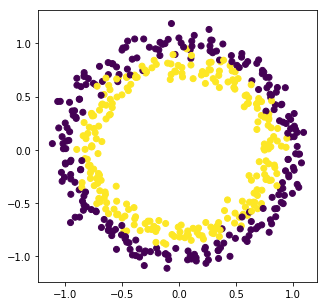

In [7]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

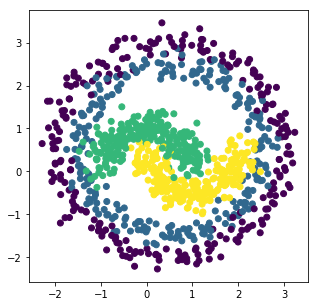

In [8]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [9]:
# To start it is worthwhile to split the sample in order to
# adequately evaluate the metrics and model performance
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, 
                                                    test_size=0.25, random_state=42, stratify=labels)

In [11]:
def show_accuracy(estimator):
    pred_test = estimator.predict(x_test)
    pred_train = estimator.predict(x_train)
    print("Accuracy on test data : {}".format(accuracy_score(y_test, pred_test)))
    print("Accuracy on train data : {}".format(accuracy_score(y_train, pred_train)))

In [55]:
# Begin with logistic regression. Obviously, we won't get anything good, but just look at it
param_grid_lr = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0.1, 10, num=50)
}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='ovr'), param_grid_lr,
                       cv=3, iid=True, verbose=1, n_jobs=-1)
grid_lr.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.1    ,  0.30204,  0.50408,  0.70612,  0.90816,  1.1102 ,
        1.31224,  1.51429,  1.71633,  1.91837,  2.12041,  2.32245,
        2.52449,  2.72653,  2.92857,  3.13061,  3.33265,  3.53469,
        3.73673,  3.93878,  4.14082,  4.34286,  4.5449 , ...367,
        8.58571,  8.78776,  8.9898 ,  9.19184,  9.39388,  9.59592,
        9.79796, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [56]:
best_lr_clf = grid_lr.best_estimator_

In [57]:
show_accuracy(best_lr_clf)

Accuracy on test data : 0.392
Accuracy on train data : 0.4093333333333333


Accuracy : 0.405


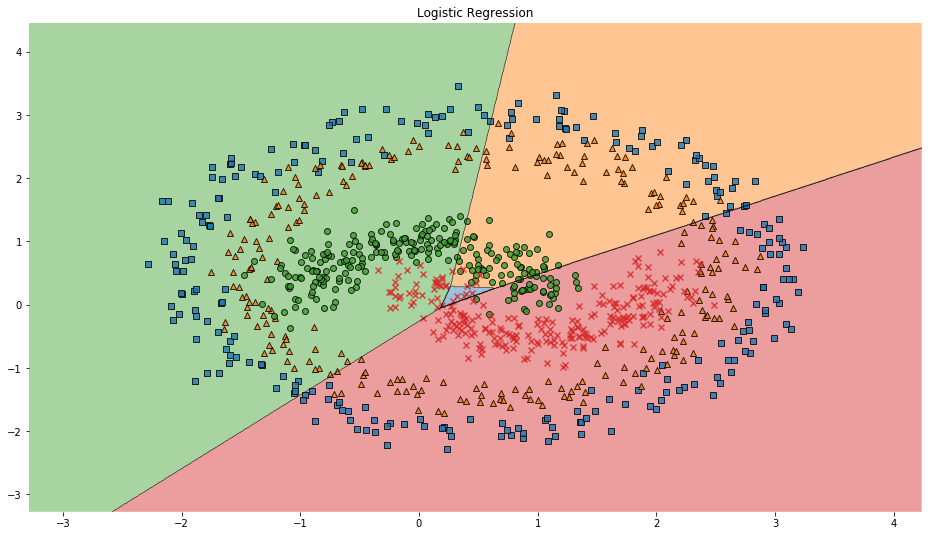

In [58]:
plot_decisions(points, labels, best_lr_clf, accuracy_score, "Accuracy", "Logistic Regression")

In [59]:
param_grid_svm = {
    'C' : np.linspace(0.1, 10000, num=50)
}
grid_svm_rbf = GridSearchCV(SVC(kernel='rbf', gamma='auto'), param_grid_svm, cv=3, iid=True, verbose=1)
grid_svm_rbf.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'C': array([1.00000e-01, 2.04180e+02, 4.08259e+02, 6.12339e+02, 8.16418e+02,
       1.02050e+03, 1.22458e+03, 1.42866e+03, 1.63274e+03, 1.83682e+03,
       2.04090e+03, 2.24498e+03, 2.44906e+03, 2.65313e+03, 2.85721e+03,
       3.06129e+03, 3.26537e+03, 3.46945e+03, 3.67353e+03, 3.87761e... 8.77552e+03, 8.97960e+03,
       9.18368e+03, 9.38776e+03, 9.59184e+03, 9.79592e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [60]:
best_svm_rbf = grid_svm_rbf.best_estimator_

In [61]:
show_accuracy(best_svm_rbf)

Accuracy on test data : 0.9
Accuracy on train data : 0.952


Accuracy : 0.939


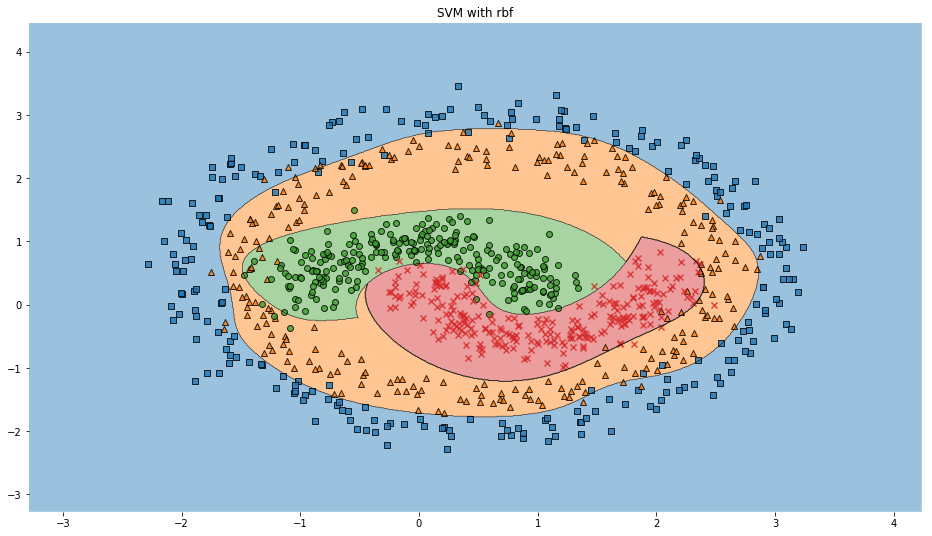

In [62]:
plot_decisions(points, labels, best_svm_rbf, accuracy_score, "Accuracy", "SVM with rbf")

In [24]:
pipeline_svm_with_pf = Pipeline([
    ("pol_features", PolynomialFeatures()),
    ("svm_clf", SVC(kernel="rbf", gamma="auto"))
])
param_grid_svm_with_pf = {
    'svm_clf__C' : np.linspace(0.1, 10000, num=50),
    'pol_features__degree' : np.arange(1, 6)
}
grid_svm_with_pf = GridSearchCV(pipeline_svm_with_pf, param_grid_svm_with_pf,
                                cv=3, iid=True, verbose=1)
grid_svm_with_pf.fit(x_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   15.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pol_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'svm_clf__C': array([1.00000e-01, 2.04180e+02, 4.08259e+02, 6.12339e+02, 8.16418e+02,
       1.02050e+03, 1.22458e+03, 1.42866e+03, 1.63274e+03, 1.83682e+03,
       2.04090e+03, 2.24498e+03, 2.44906e+03, 2.65313e+03, 2.85721e+03,
       3.06129e+03, 3.26537e+03, 3.46945e+03, 3.67353e+03,....38776e+03, 9.59184e+03, 9.79592e+03, 1.00000e+04]), 'pol_features__degree': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [25]:
best_svm_with_pf = grid_svm_with_pf.best_estimator_

In [65]:
grid_svm_with_pf.best_params_

{'pol_features__degree': 1, 'svm_clf__C': 204.1795918367347}

In [66]:
show_accuracy(best_svm_with_pf)

Accuracy on test data : 0.912
Accuracy on train data : 0.9506666666666667


Accuracy : 0.941


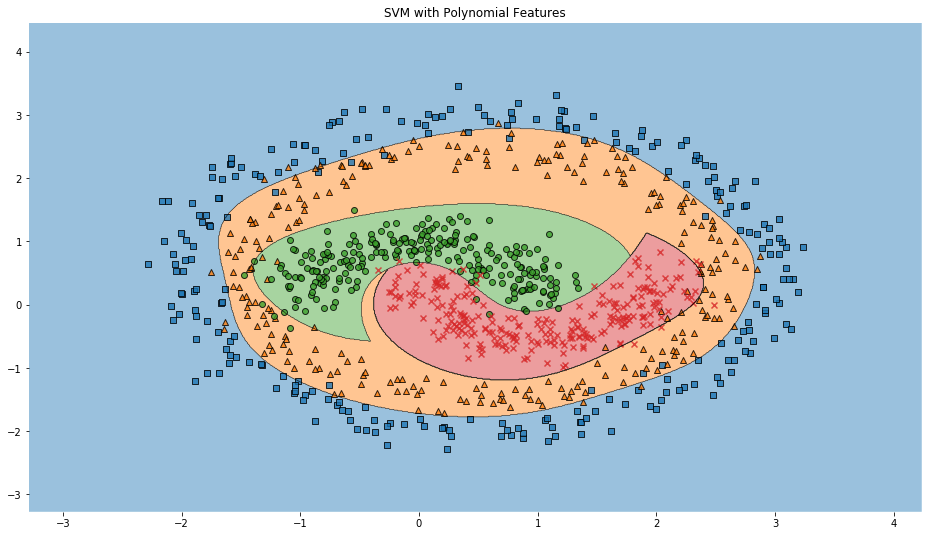

In [67]:
plot_decisions(points, labels, best_svm_with_pf, accuracy_score, "Accuracy", "SVM with Polynomial Features")

Already seems very nice. But continue the search 

In [16]:
from sklearn.preprocessing import StandardScaler

In [68]:
# try use logistic regression and polynomial features with scaler


pipeline_lr_with_pf = Pipeline([
    ("scaler", StandardScaler()),
    ("pol_features", PolynomialFeatures()),
    ("lr_clf", LogisticRegression(solver="liblinear", multi_class="ovr"))
])
param_grid_lr_with_pf = {
    "pol_features__degree" : np.arange(4, 8),
    'lr_clf__penalty' : ['l1', 'l2'],
    'lr_clf__C' : np.linspace(0.1, 10, num=50)
}

grid_lr_with_pf = GridSearchCV(pipeline_lr_with_pf, param_grid_lr_with_pf,
                               cv=3, iid=True, verbose=1, n_jobs=-1)
grid_lr_with_pf.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 625 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 875 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pol_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pol_features__degree': array([4, 5, 6, 7]), 'lr_clf__penalty': ['l1', 'l2'], 'lr_clf__C': array([ 0.1    ,  0.30204,  0.50408,  0.70612,  0.90816,  1.1102 ,
        1.31224,  1.51429,  1.71633,  1.91837,  2.12041,  2.32245,
        2.52449,  2.72653,  2.92857,  3.13061,  3.33265,  3.534...367,
        8.58571,  8.78776,  8.9898 ,  9.19184,  9.39388,  9.59592,
        9.79796, 10.     ]

In [69]:
best_lr_with_pf = grid_lr_with_pf.best_estimator_

In [70]:
grid_lr_with_pf.best_params_

{'lr_clf__C': 5.353061224489796,
 'lr_clf__penalty': 'l1',
 'pol_features__degree': 4}

In [71]:
show_accuracy(best_lr_with_pf)

Accuracy on test data : 0.932
Accuracy on train data : 0.9466666666666667


Accuracy : 0.943


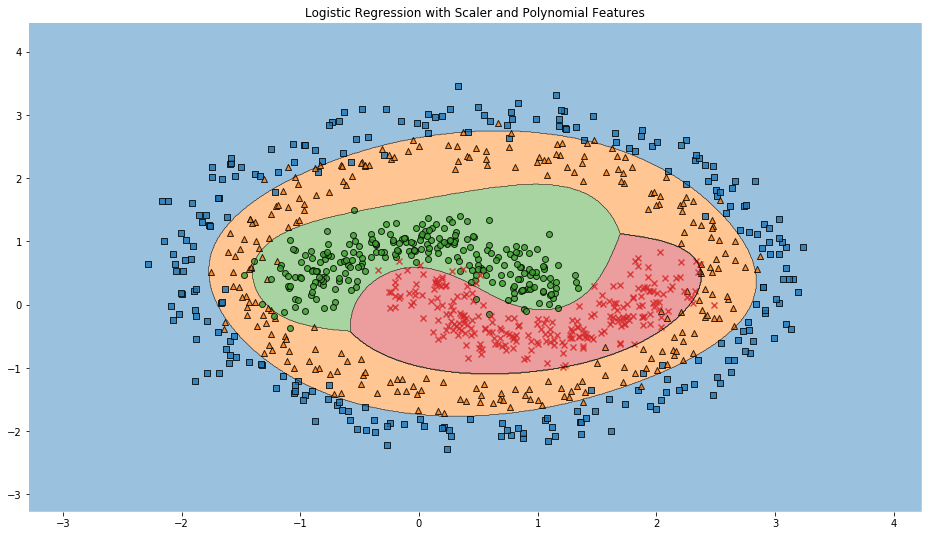

In [72]:
plot_decisions(points, labels, best_lr_with_pf, accuracy_score, "Accuracy", 
               "Logistic Regression with Scaler and Polynomial Features")

SVM with polynomial features seems very nice
So, try to improve it
Make some feature engineering

In [34]:
def add_extra_features(X):
    return np.hstack((X, np.sin(X), np.cos(X), np.exp(X)))

In [35]:
from sklearn.preprocessing import FunctionTransformer

In [39]:
pipeline_svm_with_pf_and_fe = Pipeline([
    ('add_features', FunctionTransformer(add_extra_features, validate=True)),
    ('pol_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma="auto"))
])
param_grid_svm_with_pf_and_fe = {
    "pol_features__degree" : np.arange(1, 6),
    'svm_clf__C' : np.linspace(1, 1000, num=50)
}
grid_svm_with_pf_and_fe = GridSearchCV(pipeline_svm_with_pf_and_fe, 
                                        param_grid_svm_with_pf_and_fe,
                                        cv=3, iid=True, verbose=1, n_jobs=-1)
grid_svm_with_pf_and_fe.fit(x_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   27.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('add_features', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function add_extra_features at 0x7ff9197fd840>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('pol_features', PolynomialFeatures(degree...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pol_features__degree': array([1, 2, 3, 4, 5]), 'svm_clf__C': array([   1.     ,   21.38776,   41.77551,   62.16327,   82.55102,
        102.93878,  123.32653,  143.71429,  164.10204,  184.4898 ,
        204.87755,  225.26531,  245.65306,  266.04082,  286.42857,
        306.81633,  327.2....28571,  877.67347,  898.06122,
        918.44898,  938.83673,  959.22449,  979.61224, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=Tru

In [40]:
best_svm_with_pf_and_fe = grid_svm_with_pf_and_fe.best_estimator_

In [41]:
show_accuracy(best_svm_with_pf_and_fe)

Accuracy on test data : 0.916
Accuracy on train data : 0.94


Accuracy : 0.934


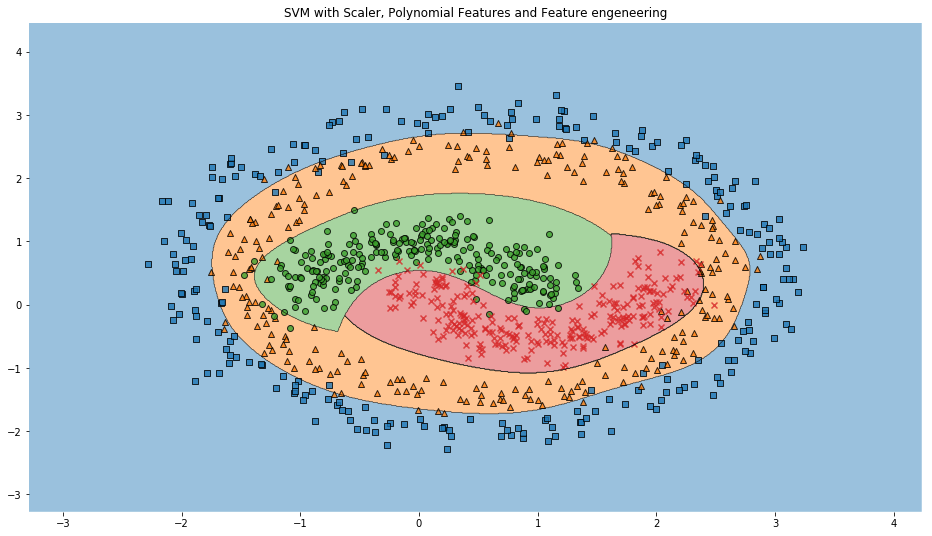

In [42]:
plot_decisions(points, labels, best_svm_with_pf_and_fe, accuracy_score, "Accuracy", 
               "SVM with Scaler, Polynomial Features and Feature engeneering")

In [48]:
pipeline_lr_with_pf_and_fe = Pipeline([
    ('add_features', FunctionTransformer(add_extra_features, validate=True)),
    ('pol_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('lr_clf', LogisticRegression(solver='liblinear', multi_class='ovr'))
])
param_grid_lr_with_pf_and_fe = {
    "pol_features__degree" : np.arange(1, 6),
    'lr_clf__penalty' : ['l1', 'l2'],
    'lr_clf__C' : np.linspace(0.1, 100, num=50)
}
grid_lr_with_pf_and_fe = GridSearchCV(pipeline_lr_with_pf_and_fe, 
                                        param_grid_lr_with_pf_and_fe,
                                        cv=3, iid=True, verbose=1, n_jobs=-1)
grid_lr_with_pf_and_fe.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 726 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 40.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('add_features', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function add_extra_features at 0x7ff9197fd840>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('pol_features', PolynomialFeatures(degree...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pol_features__degree': array([1, 2, 3, 4, 5]), 'lr_clf__penalty': ['l1', 'l2'], 'lr_clf__C': array([  0.1    ,   2.13878,   4.17755,   6.21633,   8.2551 ,  10.29388,
        12.33265,  14.37143,  16.4102 ,  18.44898,  20.48776,  22.52653,
        24.56531,  26.60408,  28.64286,  30.6816...     85.72857,  87.76735,  89.80612,  91.8449 ,  93.88367,  95.92245,
        97.96122, 100.     ])},
       pre_dispatch='2*n_jobs', refit=Tru

In [51]:
best_lr_with_pf_and_fe = grid_lr_with_pf_and_fe.best_estimator_
show_accuracy(best_lr_with_pf_and_fe)

Accuracy on test data : 0.912
Accuracy on train data : 0.948


Accuracy : 0.939


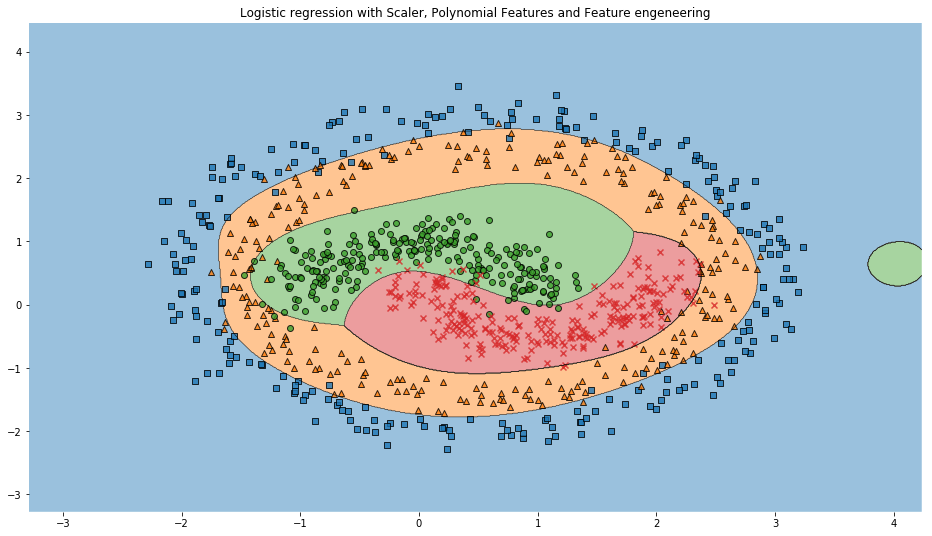

In [52]:
plot_decisions(points, labels, best_lr_with_pf_and_fe, accuracy_score, "Accuracy", 
               "Logistic regression with Scaler, Polynomial Features and Feature engeneering")

SVM has nonlinear kernel, so should try bagging

In [43]:
from sklearn.ensemble import BaggingClassifier

In [46]:
bagging_svm = BaggingClassifier(base_estimator=best_svm_with_pf_and_fe, n_estimators=40)
bagging_svm.fit(x_train, y_train);

In [47]:
show_accuracy(bagging_svm)

Accuracy on test data : 0.92
Accuracy on train data : 0.9413333333333334


Let's try something different...

In [160]:
import xgboost as xgb

In [163]:
pipeline_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb_clf", xgb.XGBClassifier())
])
param_grid_xgb = {
    "xgb_clf__max_depth" : np.arange(3, 7),
    "xgb_clf__learning_rate" : np.linspace(0.01, 0.5, num=50),
    "xgb_clf__n_estimators" : np.arange(100, 1000, 100)
}

grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb,
                               cv=3, iid=True, verbose=5, n_jobs=-1)
grid_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | ela

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb_clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_we...       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'xgb_clf__max_depth': array([3, 4, 5, 6]), 'xgb_clf__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]), 'xgb_clf__n_estimators': array([100, 200, 300, 400, 500, 600, 700,

In [164]:
best_xgb = grid_xgb.best_estimator_

In [167]:
grid_xgb.best_params_

{'xgb_clf__learning_rate': 0.21000000000000002,
 'xgb_clf__max_depth': 6,
 'xgb_clf__n_estimators': 900}

In [166]:
show_accuracy(best_xgb)

Accuracy on test data : 0.892
Accuracy on train data : 1.0


Accuracy : 0.973


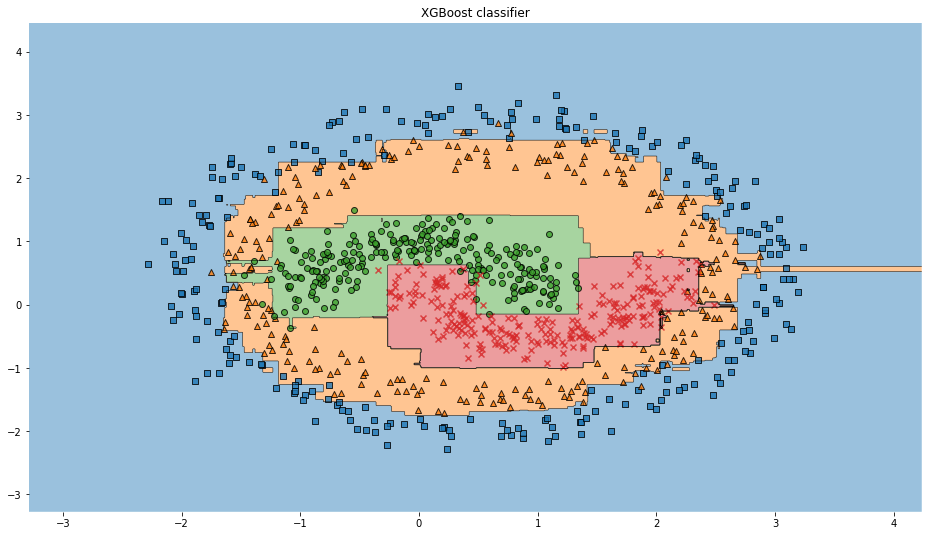

In [168]:
plot_decisions(points, labels, best_xgb, accuracy_score, "Accuracy", 
               "XGBoost classifier")

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf_clf", RandomForestClassifier())
])
param_grid_rf = {
    "rf_clf__max_depth" : np.arange(3, 7),
    "rf_clf__n_estimators" : np.arange(100, 1000, 100)
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf,
                               cv=3, iid=True, verbose=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   13.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
  ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'rf_clf__max_depth': array([3, 4, 5, 6]), 'rf_clf__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [55]:
best_rf = grid_rf.best_estimator_

In [56]:
grid_rf.best_params_

{'rf_clf__max_depth': 6, 'rf_clf__n_estimators': 700}

In [57]:
show_accuracy(best_rf)

Accuracy on test data : 0.864
Accuracy on train data : 0.94


Accuracy : 0.921


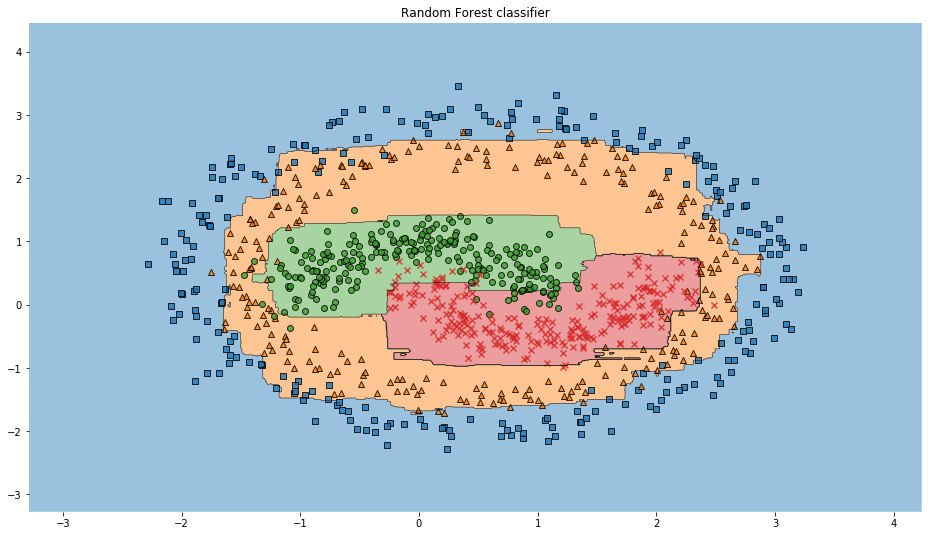

In [58]:
plot_decisions(points, labels, best_rf, accuracy_score, "Accuracy", 
               "Random Forest classifier")

In [178]:
# Let's add Polynomial Features to xgboost
pipeline_xgb_with_pf = Pipeline([
    ("scaler", StandardScaler()),
    ("pf", PolynomialFeatures()),
    ("xgb_clf", xgb.XGBClassifier())
])
param_grid_xgb_with_pf = {
    "xgb_clf__max_depth" : np.arange(5, 7),
    "xgb_clf__learning_rate" : np.linspace(0.1, 0.3, num=5),
    "xgb_clf__n_estimators" : np.arange(600, 1000, 100),
    "pf__degree" : np.arange(4, 7)
}

grid_xgb_with_pf = GridSearchCV(pipeline_xgb_with_pf, param_grid_xgb_with_pf,
                               cv=3, iid=True, verbose=5, n_jobs=-1)
grid_xgb_with_pf.fit(x_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('xgb_clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_de...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'xgb_clf__max_depth': array([5, 6]), 'xgb_clf__learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 ]), 'xgb_clf__n_estimators': array([600, 700, 800, 900]), 'pf__degree': array([4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [180]:
best_xgb_with_pf = grid_xgb_with_pf.best_estimator_

In [181]:
grid_xgb_with_pf.best_params_

{'pf__degree': 4,
 'xgb_clf__learning_rate': 0.2,
 'xgb_clf__max_depth': 5,
 'xgb_clf__n_estimators': 600}

In [182]:
show_accuracy(best_xgb_with_pf)

Accuracy on test data : 0.892
Accuracy on train data : 1.0


Accuracy : 0.973


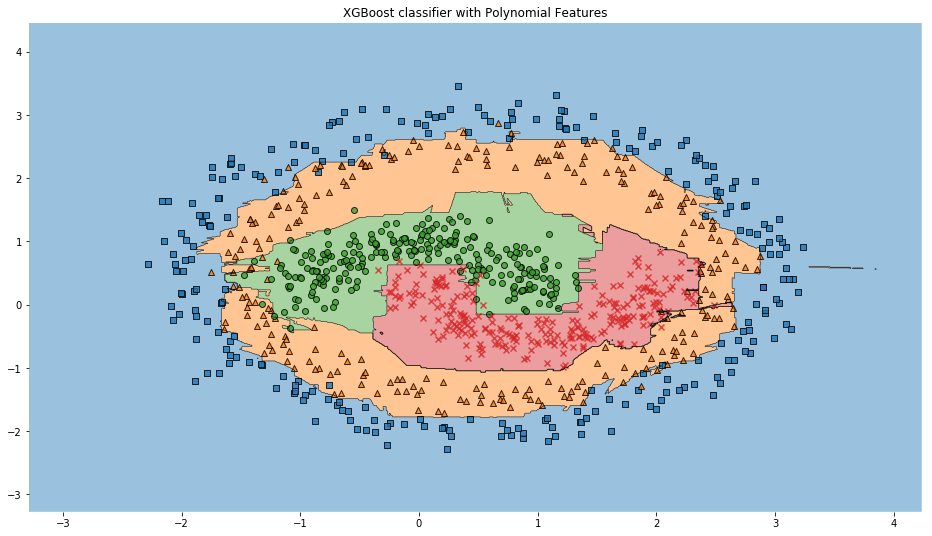

In [183]:
plot_decisions(points, labels, best_xgb_with_pf, accuracy_score, "Accuracy", 
               "XGBoost classifier with Polynomial Features")

In [186]:
pipeline_rf_with_pf = Pipeline([
    ("scaler", StandardScaler()),
    ("pf", PolynomialFeatures()),
    ("rf_clf", RandomForestClassifier())
])
param_grid_rf_with_pf = {
    "rf_clf__max_depth" : np.arange(3, 7),
    "rf_clf__n_estimators" : np.arange(100, 1000, 100),
    "pf__degree" : np.arange(3, 7)
}

grid_rf_with_pf = GridSearchCV(pipeline_rf_with_pf, param_grid_rf_with_pf,
                               cv=3, iid=True, verbose=5, n_jobs=-1)
grid_rf_with_pf.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('rf_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_le...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'rf_clf__max_depth': array([3, 4, 5, 6]), 'rf_clf__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'pf__degree': array([3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [187]:
best_rf_with_pf = grid_rf_with_pf.best_estimator_

In [188]:
grid_rf_with_pf.best_params_

{'pf__degree': 5, 'rf_clf__max_depth': 5, 'rf_clf__n_estimators': 300}

In [190]:
show_accuracy(best_rf_with_pf)

Accuracy on test data : 0.856
Accuracy on train data : 0.936


Accuracy : 0.916


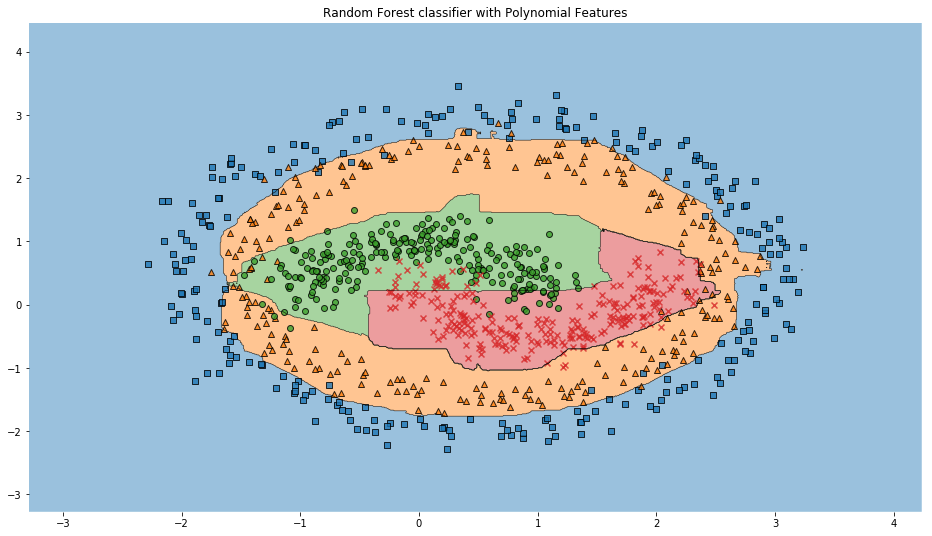

In [191]:
plot_decisions(points, labels, best_rf_with_pf, accuracy_score, "Accuracy", 
               "Random Forest classifier with Polynomial Features")

**Вывод**
Наилучший результат на тесте показала модель `Logistic Regression` с `Polinomial Features` (`degree=4`)

Так же неплохо отработала `svm` с `kernel=rbf` и `Poliomial Features`

`Bagging` не принес улучшений модели.

Попробовал сделать `Feature Engineering`: добавил синус, косинус и экспоненту к вектору фичей (форма данных немного напоминает эти функции), однако значительного улучшения не наблюдается. Возможно, связано с тем, что не очень хорошо подобрал другие параметры для модели.

Также взглянул на градиентый бустинг и случайный лес. Работают немного хуже на этом датасете, однако результаты довольно неплохие.